<a href="https://colab.research.google.com/github/thequickbrownfoxjumpedoverthelazydog/2022-HiMCM-Python-Models/blob/main/Python%20Models/LinearModelSKLearnTemperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

	
df = pd.read_csv(io.BytesIO(uploaded['2022_HiMCM_Data.csv']))

df.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df = df[["Year", "Degrees C"]]

df.tail()

,Year,Degrees C
59,2018.0,0.84
60,2019.0,0.97
61,2020.0,1.02
62,2021.0,0.84
63,NaN,0.84


In [ ]:
df = df.drop(63, axis=0)
df.tail()

,Year,Degrees C
58,2017.0,0.92
59,2018.0,0.84
60,2019.0,0.97
61,2020.0,1.02
62,2021.0,0.84


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15,)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
accuracy = model.score(x_test, y_test)
accuracy

0.7438902689096505

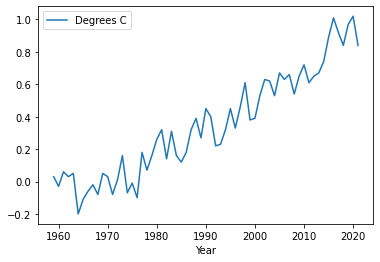

In [ ]:
df.plot(x='Year', y='Degrees C', kind='line')	

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, x_test, y_test, cv=10)
y_test

array([-0.01, -0.2 ,  0.16,  0.22,  0.14,  0.26,  0.67,  0.03,  0.03,
        0.39])

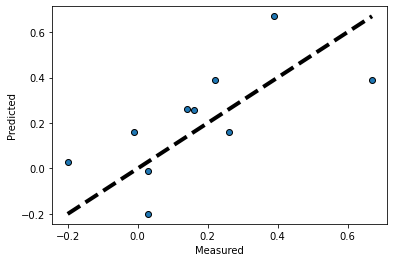

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, predicted)
coefficient_of_dermination

0.3129645446723164

In [ ]:
for x in range(2021, 2031):
  y = model.predict([[ x ]])
  print(y)

[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]
[0.8493417]


In [ ]:
uploaded2 = files.upload()

	
df2 = pd.read_csv(io.BytesIO(uploaded['2022_HiMCM_Data.csv']))

df2.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data (1).csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df2 = df2[["Degrees C", "Year"]]
df2.head()

df2 = df2.drop(63, axis=0)

In [ ]:
X2 = df2.iloc[:, :-1].values
Y2 = df2.iloc[:, -1].values

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.15)

In [ ]:
model2 = GradientBoostingRegressor()
model2.fit(x_train2, y_train2)

GradientBoostingRegressor()

In [ ]:
accuracy2 = model2.score(x_test2, y_test2)
accuracy2

0.9048231979877505

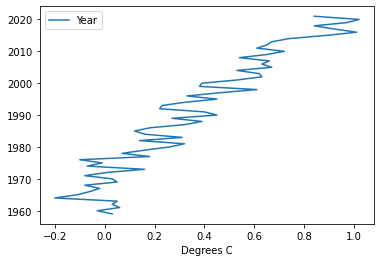

In [ ]:
df2.plot(x='Degrees C', y='Year', kind='line')	

In [ ]:
predicted2 = cross_val_predict(model2, x_test2, y_test2, cv=10)

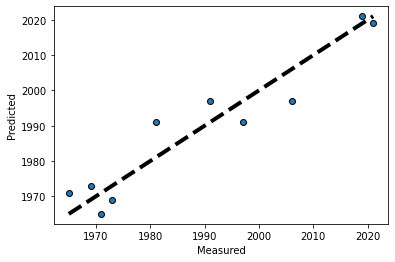

In [ ]:
from matplotlib import pyplot as plt
fig2, ax2 = plt.subplots()
ax2.scatter(y_test2, predicted2, edgecolors=(0, 0, 0))
ax2.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=4)
ax2.set_xlabel('Measured')
ax2.set_ylabel('Predicted')
plt.show()

In [ ]:
model2.predict([ [1.25]])

array([2019.6502481, 2019.6502481])

In [ ]:
df_smooth = df.iloc[::2, :]

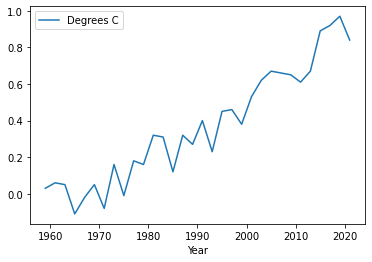

In [ ]:
df_smooth.plot(x="Year", y="Degrees C")

In [ ]:
from sklearn.model_selection import train_test_split
X_smooth = df_smooth.iloc[:, :-1].values
Y_smooth = df_smooth.iloc[:, -1].values

x_train_smooth, x_test_smooth, y_train_smooth, y_test_smooth = train_test_split(X_smooth, Y_smooth, test_size = 0.15,)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_smooth = GradientBoostingRegressor()
model_smooth.fit(x_train_smooth, y_train_smooth)

GradientBoostingRegressor()

In [ ]:
prediction_smooth = model_smooth.score(x_test_smooth, y_test_smooth)
print(prediction_smooth)

0.8747981874782426


In [ ]:
from sklearn.model_selection import cross_val_predict
prediction_smooth = cross_val_predict(model_smooth, x_test_smooth, y_test_smooth, cv=3)

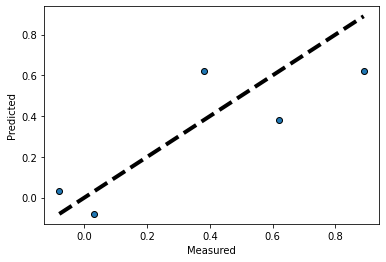

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test_smooth, prediction_smooth, edgecolors=(0, 0, 0))
ax.plot([y_test_smooth.min(), y_test_smooth.max()], [y_test_smooth.min(), y_test_smooth.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df_smooth2 = df2.iloc[::2, :]

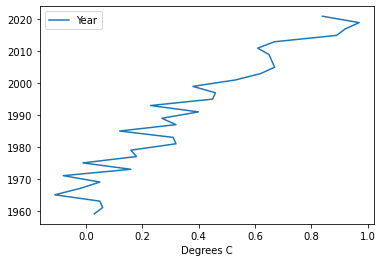

In [ ]:
df_smooth2.plot(x="Degrees C", y="Year")

In [ ]:
X_smooth2 = df_smooth2.iloc[:, :-1].values
Y_smooth2= df_smooth2.iloc[:, -1].values

x_train_smooth2, x_test_smooth2, y_train_smooth2, y_test_smooth2 = train_test_split(X_smooth2, Y_smooth2, test_size = 0.15,)

In [ ]:
model_smooth2 = GradientBoostingRegressor()
model_smooth2.fit(x_train_smooth2, y_train_smooth2)

GradientBoostingRegressor()

In [ ]:
acc = model_smooth2.score(x_test_smooth2, y_test_smooth2)
acc * 100

93.09790447440336

In [ ]:
from sklearn.model_selection import cross_val_predict
prediction_smooth2 = cross_val_predict(model_smooth2, x_test_smooth2, y_test_smooth2, cv=3)

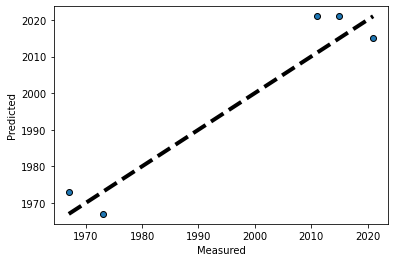

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(y_test_smooth2, prediction_smooth2, edgecolors=(0, 0, 0))
ax2.plot([y_test_smooth2.min(), y_test_smooth2.max()], [y_test_smooth2.min(), y_test_smooth2.max()], 'k--', lw=4)
ax2.set_xlabel('Measured')
ax2.set_ylabel('Predicted')
plt.show()

In [ ]:
uploaded3 = files.upload()

	
dfavg = pd.read_csv(io.BytesIO(uploaded3['2022_HiMCM_Data.csv']))

dfavg.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
dfavg = dfavg.drop(["PPM"], axis=1)
# dfavg = dfavg.drop(["Unnamed: 0"], axis=1)
# dfavg.head()
dfavg = dfavg.drop(63)
dfavg.tail()

,Year,Degrees C
58,2017.0,0.92
59,2018.0,0.84
60,2019.0,0.97
61,2020.0,1.02
62,2021.0,0.84


In [ ]:
# dfavg['Degrees C Rolling'] = dfavg['Degrees C'].rolling(3).mean()
dfavg['rolling_temperature'] = dfavg['Degrees C'].rolling(3).mean()
dfavg

,Year,Degrees C,rolling_temperature
0,1959.0,0.03,NaN
1,1960.0,-0.03,NaN
2,1961.0,0.06,0.020000
3,1962.0,0.03,0.020000
4,1963.0,0.05,0.046667
...,...,...,...
58,2017.0,0.92,0.940000
59,2018.0,0.84,0.923333
60,2019.0,0.97,0.910000
61,2020.0,1.02,0.943333


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'
with open(path, 'w', encoding='utf-8-sig') as f:
  dfavg.to_csv(f)

Mounted at /content/drive


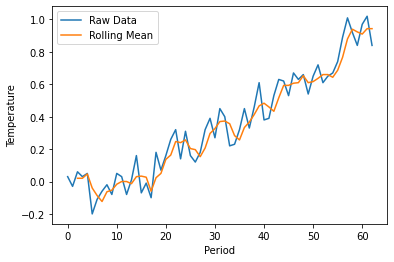

In [ ]:
from matplotlib import pyplot as plt
plt.plot(dfavg['Degrees C'], label='Raw Data')
plt.plot(dfavg['rolling_temperature'], label='Rolling Mean')
plt.legend()
plt.ylabel('Temperature')
plt.xlabel('Period')
plt.show()

In [ ]:
dfavg = dfavg.drop("Degrees C", axis = 1)
dfavg_train = dfavg.drop([0, 1], axis=0)
dfavg_train

,Year,rolling_temperature
2,1961.0,0.020000
3,1962.0,0.020000
4,1963.0,0.046667
5,1964.0,-0.040000
6,1965.0,-0.086667
...,...,...
58,2017.0,0.940000
59,2018.0,0.923333
60,2019.0,0.910000
61,2020.0,0.943333


In [ ]:
from sklearn.model_selection import train_test_split

X_mean = dfavg_train.iloc[:, :-1].values
Y_mean= dfavg_train.iloc[:, -1].values

x_mean_train, x_mean_test, y_mean_train, y_mean_test = train_test_split(X_mean, Y_mean, test_size = 0.15,)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
meanModel = GradientBoostingRegressor()
meanModel.fit(x_mean_train, y_mean_train)

GradientBoostingRegressor()

In [ ]:
meanscore = meanModel.score(x_mean_test, y_mean_test)
meanscore

0.9821154464898346

In [ ]:
from sklearn.model_selection import cross_val_predict
prediction_mean = cross_val_predict(meanModel, x_mean_test, y_mean_test, cv=2)

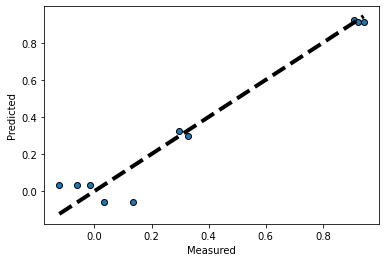

In [ ]:
fig2, ax3 = plt.subplots()
ax3.scatter(y_mean_test, prediction_mean, edgecolors=(0, 0, 0))
ax3.plot([y_mean_test.min(), y_mean_test.max()], [y_mean_test.min(), y_mean_test.max()], 'k--', lw=4)
ax3.set_xlabel('Measured')
ax3.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination_2 = r2_score(y_mean_test, prediction_mean)
coefficient_of_dermination_2

0.9482086309007217

In [ ]:
guess = meanModel.predict([ [2050] ])
guess

array([0.94162487])

In [ ]:
xfit = np.linspace(2000, 2030, 50)
xfit
yfit = meanModel.predict(xfit[:, np.newaxis])

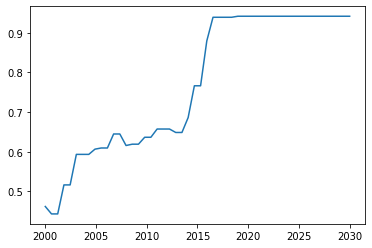

In [ ]:
plt.plot(xfit, yfit);

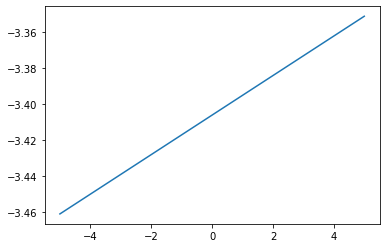

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = 0.011*x - 3.406
# plt.plot(x, y, '-r', label='y=2x+1')
# plt.title('Graph of y=2x+1')
# plt.xlabel('x', color='#1C2833')
# plt.ylabel('y', color='#1C2833')
# plt.legend(loc='upper left')
# plt.grid()
# plt.show()

fig, ax = plt.subplots()
ax.plot(x, y)
